# Préparation l'environnement pour Redis

In [ ]:
# Installation de Redis et de la bibliothèque Python
!apt update
!apt install redis-server -y
!pip install redis

# Démarrage de Redis
import os
os.system("redis-server --daemonize yes")
print("Redis démarré")


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,148 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,486 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

# Chargement des fichiers dans Redis

In [ ]:
import redis
import pandas as pd

# Connexion au serveur Redis
redis_client = redis.Redis(host='localhost', port=6379, decode_responses=True)

# Chargement des données
file_path = "/content/E-commerce Dataset (1).csv"  # Mettez ici le chemin du fichier
data = pd.read_csv(file_path)

# Ajouter les données dans Redis (par exemple, chaque ligne comme un hash)
for idx, row in data.iterrows():
    key = f"order:{idx}"  # Nom unique pour chaque enregistrement
    redis_client.hset(key, mapping=row.to_dict())

print("Données chargées dans Redis avec succès.")


Données chargées dans Redis avec succès.


# Récupération les données d'une commande spécifique

In [ ]:
# Récupérer une commande spécifique
order_key = "order:0"  # Exemple : la première commande
order_data = redis_client.hgetall(order_key)

print(f"Données pour {order_key}:")
print(order_data)
Q

Données pour order:0:
{'Order_Date': '2018-01-02', 'Time': '10:56:33', 'Aging': '8.0', 'Customer_Id': '37077', 'Gender': 'Female', 'Device_Type': 'Web', 'Customer_Login_type': 'Member', 'Product_Category': 'Auto & Accessories', 'Product': 'Car Media Players', 'Sales': '140.0', 'Quantity': '1.0', 'Discount': '0.3', 'Profit': '46.0', 'Shipping_Cost': '4.6', 'Order_Priority': 'Medium', 'Payment_method': 'credit_card'}


# Répartition des catégories de produits

In [ ]:
# prompt: Répartition des catégories de produits

# Répartition des catégories de produits
product_categories = data['Product_Category'].value_counts()
print("Répartition des catégories de produits :")
product_categories

Répartition des catégories de produits :


,count
Product_Category,
Fashion,25646
Home & Furniture,15438
Auto & Accessories,7505
Electronic,2701


# Extration des données de Redis pour les analyse

In [ ]:
import json

# Récupérer toutes les commandes
orders = []
for key in redis_client.scan_iter(match="order:*"):
    orders.append(redis_client.hgetall(key))

# Convertir les données en DataFrame pour visualisation
orders_df = pd.DataFrame(orders)
orders_df.head()


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Month
0,2018-01-11,11:38:12,5.0,12202,Female,Web,Member,Fashion,Casula Shoes,122.0,5.0,0.5,11.5,1.2,Critical,money_order,1
1,2018-11-16,20:08:38,3.0,88169,Female,Web,Member,Home & Furniture,Shoe Rack,124.0,5.0,0.2,37.8,3.8,High,credit_card,11
2,2018-08-03,18:34:16,1.0,33747,Male,Web,Member,Fashion,Sneakers,62.0,1.0,0.5,62.0,6.2,Medium,credit_card,8
3,2018-03-01,19:46:28,3.0,87886,Female,Web,Member,Home & Furniture,Dinning Tables,119.0,4.0,0.4,20.0,2.0,High,money_order,3
4,2018-09-06,08:19:38,8.0,82326,Female,Mobile,Member,Home & Furniture,Sofas,67.0,5.0,0.2,13.4,1.3,Medium,credit_card,9


# Comptons les occurrences des produits

<Axes: title={'center': 'Produits les plus populaires'}, xlabel='Product'>

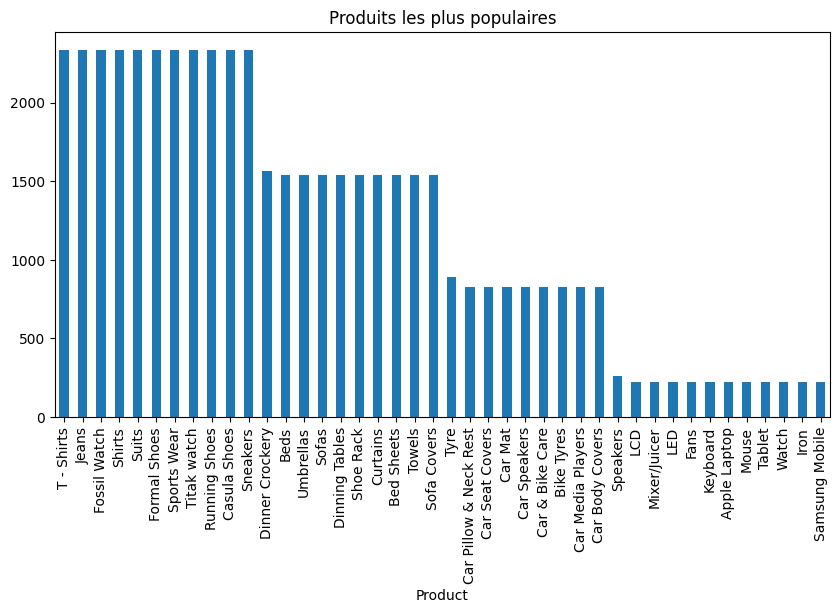

In [ ]:
# Compter les occurrences de chaque produit
product_counts = orders_df['Product'].value_counts()

# Visualiser sous forme de graphique
product_counts.plot(kind='bar', title="Produits les plus populaires", figsize=(10, 5))


#Créer une liste Redis contenant tous les produits uniques

In [ ]:
# Obtenir tous les produits uniques
unique_products = data['Product'].unique()

# Stocker les produits uniques dans une liste Redis
redis_client.delete('unique_products')  # Supprimer la liste existante si elle existe
for product in unique_products:
  redis_client.rpush('unique_products', product)

# Vérifier les produits stockés
stored_products = redis_client.lrange('unique_products', 0, -1)
print("Produits uniques stockés dans Redis:")
stored_products

Produits uniques stockés dans Redis:


['Car Media Players',
 'Car Speakers',
 'Car Body Covers',
 'Car & Bike Care',
 'Tyre',
 'Bike Tyres',
 'Car Mat',
 'Car Seat Covers',
 'Car Pillow & Neck Rest',
 'Shirts',
 'Jeans',
 'Suits',
 'Sports Wear',
 'Casula Shoes',
 'Running Shoes',
 'Formal Shoes',
 'Sneakers',
 'Titak watch',
 'Fossil Watch',
 'T - Shirts',
 'Samsung Mobile',
 'Watch',
 'Fans',
 'Iron',
 'Tablet',
 'Mouse',
 'Keyboard',
 'Apple Laptop',
 'Mixer/Juicer',
 'LED',
 'LCD',
 'Speakers',
 'Sofa Covers',
 'Bed Sheets',
 'Curtains',
 'Towels',
 'Sofas',
 'Beds',
 'Dinning Tables',
 'Shoe Rack',
 'Umbrellas',
 'Dinner Crockery']

Répartition des catégories de produits :
Product_Category
Fashion               25646
Home & Furniture      15438
Auto & Accessories     7505
Electronic             2701
Name: count, dtype: int64


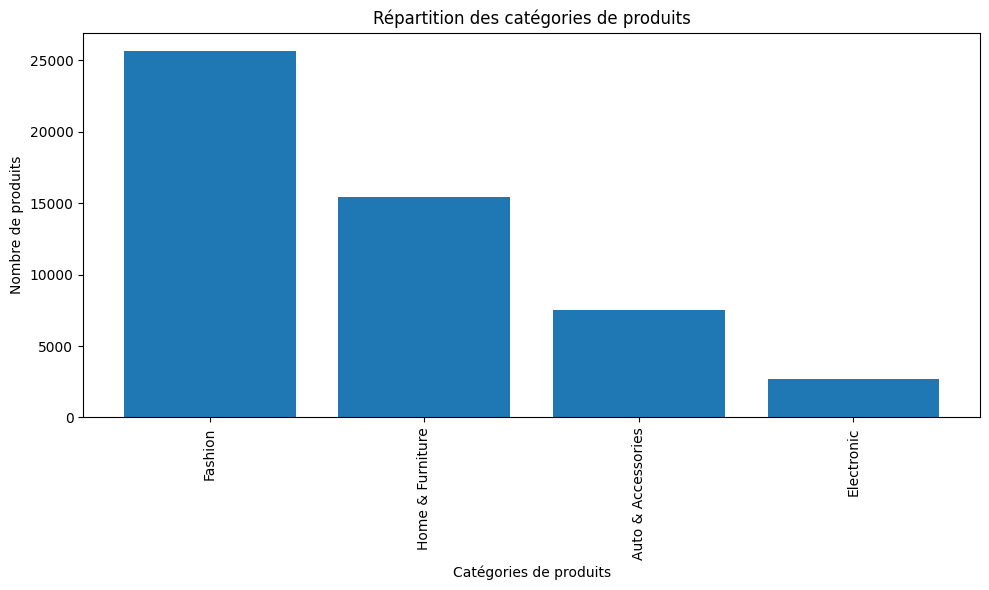

In [ ]:
# prompt: compter les catégories , tracer l'histogramme

import matplotlib.pyplot as plt

# ... (votre code précédent) ...

# Répartition des catégories de produits
product_categories = data['Product_Category'].value_counts()
print("Répartition des catégories de produits :")
print(product_categories)

# Tracer l'histogramme des catégories de produits
plt.figure(figsize=(10, 6))
plt.bar(product_categories.index, product_categories.values)
plt.xlabel("Catégories de produits")
plt.ylabel("Nombre de produits")
plt.title("Répartition des catégories de produits")
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

# Diagramme circulaire des moyens de paiement

Répartition des moyens de paiement :
Payment_method
credit_card    38137
money_order     9629
e_wallet        2789
debit_card       734
not_defined        1
Name: count, dtype: int64


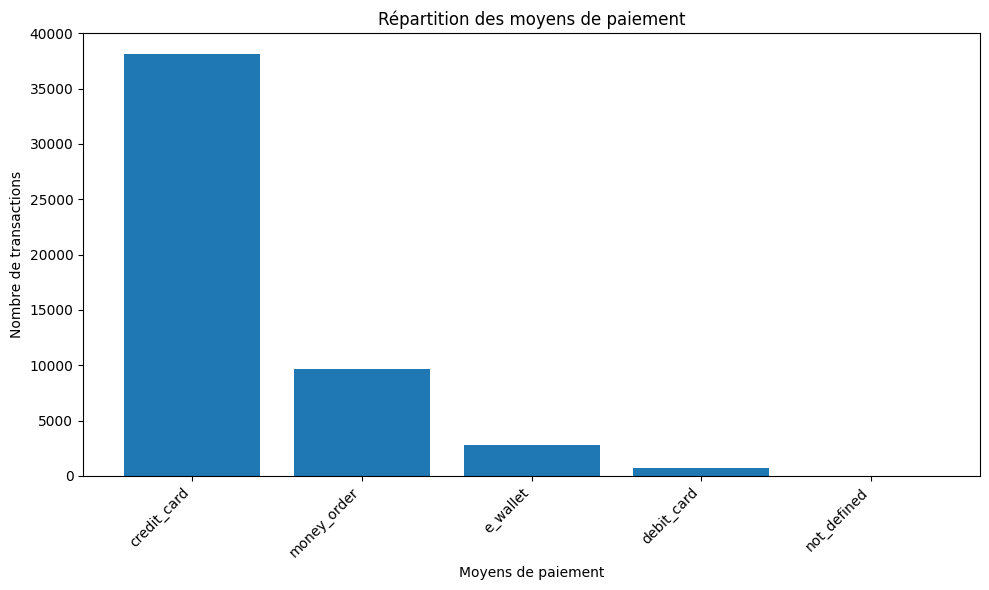

In [ ]:
# Compter les moyens de paiement
payment_methods = data['Payment_method'].value_counts()
print("Répartition des moyens de paiement :")
print(payment_methods)

# Tracer l'histogramme des moyens de paiement
plt.figure(figsize=(10, 6))
plt.bar(payment_methods.index, payment_methods.values)
plt.xlabel("Moyens de paiement")
plt.ylabel("Nombre de transactions")
plt.title("Répartition des moyens de paiement")
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

Répartition des moyens de paiement :
Payment_method
credit_card    38137
money_order     9629
e_wallet        2789
debit_card       734
not_defined        1
Name: count, dtype: int64


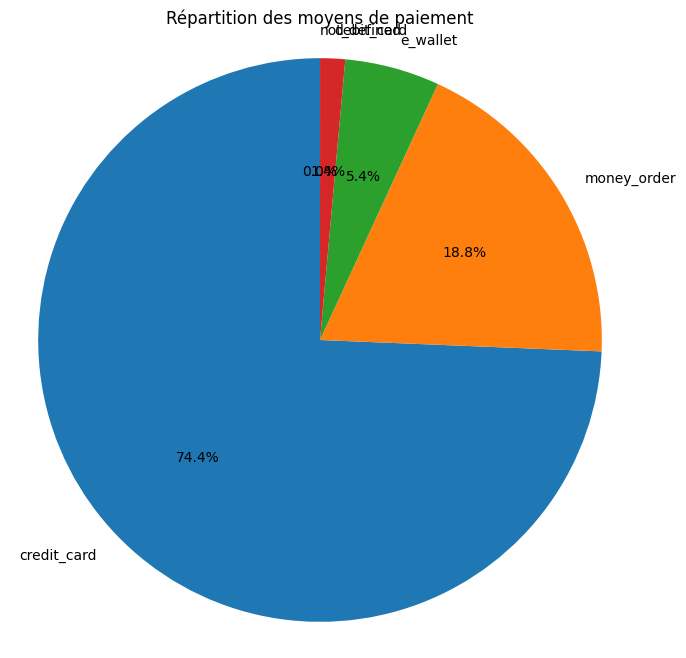

In [ ]:
# Compter les moyens de paiement
payment_methods = data['Payment_method'].value_counts()
print("Répartition des moyens de paiement :")
print(payment_methods)

# Tracer le diagramme circulaire des moyens de paiement
plt.figure(figsize=(8, 8))
plt.pie(payment_methods.values, labels=payment_methods.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des moyens de paiement")
plt.axis('equal')  # Assurer un cercle parfait
plt.show()

# La courbe représentant les ventes par mois

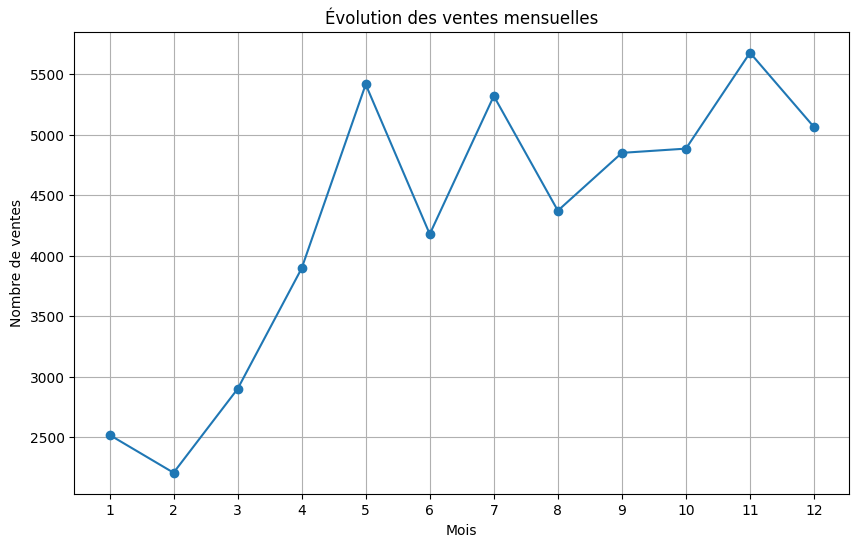

In [ ]:
# Convertir la colonne 'Order_Date' en objets datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Extraire le mois de la colonne 'Order_Date'
data['Month'] = data['Order_Date'].dt.month

# Calculer le nombre de ventes par mois
monthly_sales = data.groupby('Month')['Customer_Id'].count()

# Tracer la courbe des ventes mensuelles
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel("Mois")
plt.ylabel("Nombre de ventes")
plt.title("Évolution des ventes mensuelles")
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.show()

# Répartition des clients par genre

Répartition des clients par genre :
Gender
Male      28138
Female    23152
Name: count, dtype: int64


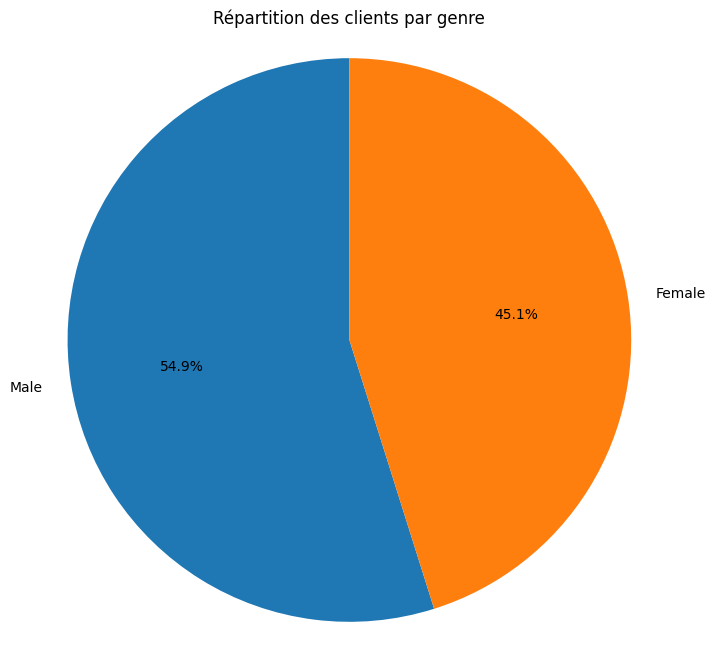

In [ ]:
# Répartition des clients par genre
gender_distribution = data['Gender'].value_counts()
print("Répartition des clients par genre :")
print(gender_distribution)

# Tracer le diagramme circulaire de la répartition des clients par genre
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des clients par genre")
plt.axis('equal')  # Assurer un cercle parfait
plt.show()

# Conversion des types non compatibles

In [ ]:
# Parcourir chaque ligne et stocker dans Redis
for index, row in data.iterrows():
    order_id = f"Customer:{row['Customer_Id']}"  # Clé unique pour chaque commande

    # Conversion des types non compatibles
    redis_client.hset(order_id, mapping={
        "customer_id": row['Customer_Id'],  # Suppose que Customer_Id est déjà compatible
        "product": row['Product'],  # Suppose que Product est une chaîne
        "sales": float(row['Sales']),  # Convertir en float si nécessaire
        "order_date": str(row['Order_Date']),  # Convertir les Timestamp en string
        "time": str(row['Time']),  # Convertir les données de type datetime ou autres en string
        "payment_method": row['Payment_method'],  # Suppose que Payment_method est une chaîne
        "product_category": row['Product_Category']  # Suppose que Product_Category est une chaîne
    })

# Vérifier une commande spécifique
print(redis_client.hgetall("Customer:1"))


{}


# Impact des remises sur le profit (Scatter Plot)

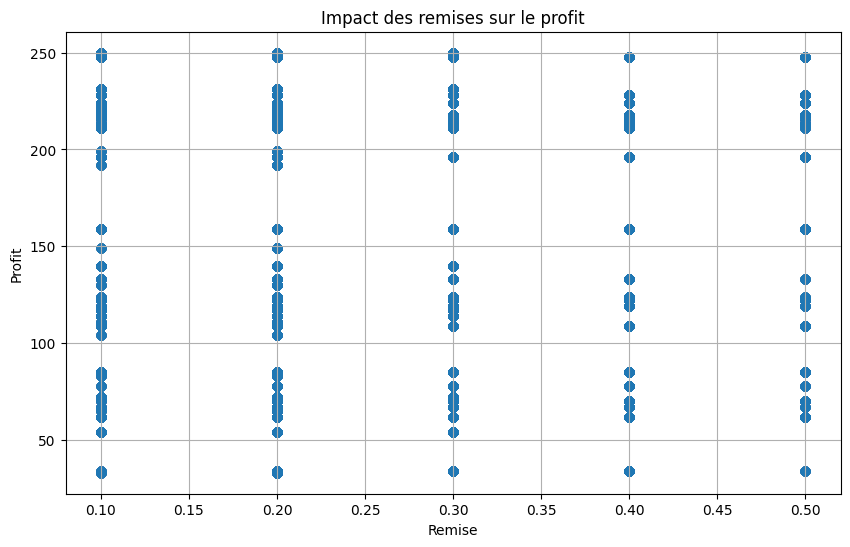

In [ ]:
# Impact des remises sur le profit (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(data['Discount'], data['Sales'])
plt.xlabel("Remise")
plt.ylabel("Profit")
plt.title("Impact des remises sur le profit")
plt.grid(True)
plt.show()

# Comparaison des types de clients

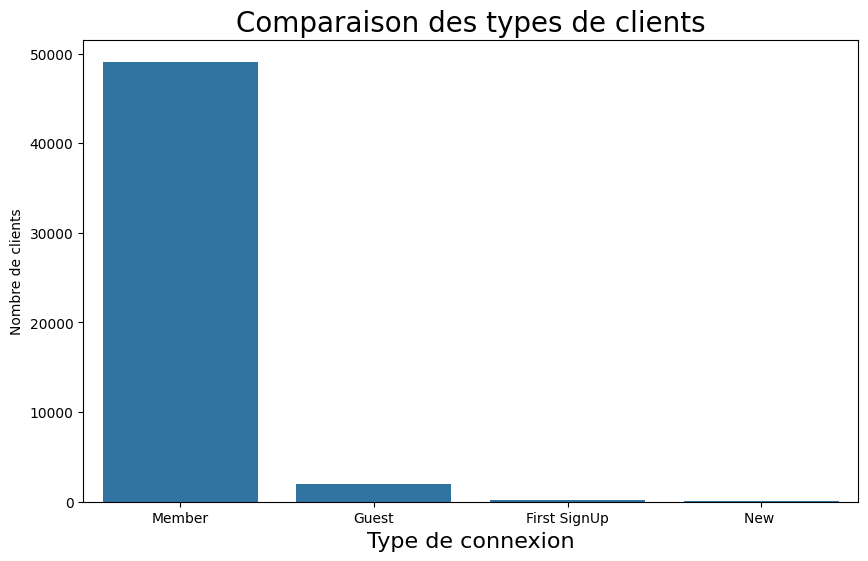

In [ ]:
# Comparaison des types de clients (Diagramme en barres)
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df, x="Customer_Login_type")
plt.title("Comparaison des types de clients", fontsize=20)
plt.xlabel("Type de connexion", fontsize=16)
plt.ylabel("Nombre de clients", fontsize=10)
plt.show()